In [1]:
import pandas as pd
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
from config import api_keys
%matplotlib inline

In [2]:
#generate random list for latitudes and longitudes 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)


In [3]:
#Create and variable called latitude_and_Longitude and store all random latitudes and longitudes generated

latitude_and_Longitude = tuple(zip(latitude,longitude))
#latitude_and_Longitude

In [4]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cities.append(city.city_name)
    
    country.append(city.country_code)
    

In [ ]:
#Print out how many the different cities were generated

#print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))
#print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

In [5]:
#create a dataframe to store all the cities and countries generated with citipy

df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#add additional blank columns to store information from openweathermap api

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''
#df_countries.head()
df_countries.shape

(2000, 8)

In [6]:
#drop all duplicates in column Cities.

df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')
df_countries.shape

(764, 8)

In [7]:
#loop through all rows and fill in values for blank columns in dataframe

for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_keys)
  
    country_info = requests.get(api_url).json()
    
    #print all api url's for each city
    print(api_url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

http://api.openweathermap.org/data/2.5/forecast?q=luderitz,na&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

http://api.openweathermap.org/data/2.5/forecast?q=shimoda,jp&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=new norfolk,au&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=ilulissat,gl&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=umzimvubu,za&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
Missing weather information...skip


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

http://api.openweathermap.org/data/2.5/forecast?q=maldonado,uy&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=pevek,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=severo-kurilsk,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=riberalta,bo&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=kodiak,us&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=longyearbyen,sj&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a

http://api.openweathermap.org/data/2.5/forecast?q=barrow,us&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=iskateley,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=muros,es&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=barentsburg,sj&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=mayumba,ga&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=san pedro,ar&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=arlit,ne&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=biak,id&units=IMPERIAL&mode=json&APPI

http://api.openweathermap.org/data/2.5/forecast?q=bonthe,sl&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=bilma,ne&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=gushikawa,jp&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=imbituba,br&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=coos bay,us&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=el wasta,eg&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=port hardy,ca&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=faya,td&units=IMPERIAL&mode=json&AP

http://api.openweathermap.org/data/2.5/forecast?q=cidreira,br&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=necochea,ar&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=coihaique,cl&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=port elizabeth,za&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=ahipara,nz&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=bhandara,in&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=benjamin constant,br&units=IMPERIAL&mode=json&APPID=066f69d8d3

http://api.openweathermap.org/data/2.5/forecast?q=souillac,mu&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=kumphawapi,th&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=labuhan,id&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=verkhovazhye,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=tura,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=bria,cf&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=taksimo,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=hofn,is&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a


http://api.openweathermap.org/data/2.5/forecast?q=pitimbu,br&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=chabahar,ir&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=christchurch,nz&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=sechura,pe&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=paamiut,gl&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=scarborough,tt&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=namatanai,pg&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=abha,sa&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72

http://api.openweathermap.org/data/2.5/forecast?q=sulangan,ph&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=marawi,sd&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=macusani,pe&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=loreto,mx&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=ahuimanu,us&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=ito,jp&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=qeshm,ir&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=popondetta,pg&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
ht

http://api.openweathermap.org/data/2.5/forecast?q=ostrovnoy,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=hailar,cn&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=tiarei,pf&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=san quintin,mx&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=port blair,in&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=mareeba,au&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=tecoanapa,mx&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=innisfail,au&units=IMPERIAL&mod

http://api.openweathermap.org/data/2.5/forecast?q=high prairie,ca&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=dondo,mz&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=kayankulam,in&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=malatya,tr&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=bodden town,ky&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=parrita,cr&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=grand-bourg,gp&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=kieta,pg&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6

http://api.openweathermap.org/data/2.5/forecast?q=dharur,in&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=guajara-mirim,br&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=abonnema,ng&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=camacha,pt&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=portland,au&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=batticaloa,lk&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=palmares do sul,br&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=srednekolymsk,ru&units

http://api.openweathermap.org/data/2.5/forecast?q=turtkul,uz&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=novyy urgal,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=matagami,ca&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=sosva,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=damghan,ir&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=suamico,us&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=egvekinot,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=pokhara,np&units=IMPERIAL&mode=json

http://api.openweathermap.org/data/2.5/forecast?q=berlevag,no&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=naryan-mar,ru&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=assiniboia,ca&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=bonavista,ca&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=yuncheng,cn&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=namwala,zm&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=ichhawar,in&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a72b5b04a1a
http://api.openweathermap.org/data/2.5/forecast?q=hualmay,pe&units=IMPERIAL&mode=json&APPID=066f69d8d38f5e6e6a6a6a

In [8]:
#change all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

In [9]:
#display dataframe df_countries after openweathermap api calls 
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,luderitz,na,-26.6481,15.1594,49.44,92.0,0.0,14.45
1,shimoda,jp,34.7010,138.9287,68.58,100.0,100.0,2.93
2,new norfolk,au,-42.7802,147.0615,48.42,92.0,64.0,9.64
3,ilulissat,gl,69.2167,-51.1000,36.18,92.0,92.0,9.19
4,umzimvubu,za,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
length_of_original_DF = len(df_countries)
length_after_dropna = len(df_countries.dropna())

missing_weather_info = length_of_original_DF - length_after_dropna
length_after_dropna

679

In [16]:
print('For the following cities associated with this dataframe, {} cities did not contain weather\
 information. These cities\t will be dropped from this dataframe.'.format(missing_weather_info))

print('\n')

print("The dataframe used for plotting contains weather information for {} different cities. "\
      .format(len(df_countries.dropna())))

For the following cities associated with this dataframe, 85 cities did not contain weather information. These cities	 will be dropped from this dataframe.


The dataframe used for plotting contains weather information for 679 different cities. 


In [18]:
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='df_countries.csv')
df_countries

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,luderitz,na,-26.6481,15.1594,49.44,92.0,0.0,14.45
1,shimoda,jp,34.7010,138.9287,68.58,100.0,100.0,2.93
2,new norfolk,au,-42.7802,147.0615,48.42,92.0,64.0,9.64
3,ilulissat,gl,69.2167,-51.1000,36.18,92.0,92.0,9.19
5,maldonado,uy,-34.9088,-54.9583,48.70,89.0,68.0,19.15
6,pevek,ru,69.7028,170.2747,45.57,67.0,8.0,8.75
7,rikitea,pf,-23.1203,-134.9692,76.62,100.0,80.0,13.44
8,severo-kurilsk,ru,50.6789,156.1250,45.66,92.0,92.0,13.44
9,busselton,au,-33.6445,115.3489,54.66,100.0,12.0,9.53
10,riberalta,bo,-10.9974,-66.0752,78.58,61.0,8.0,3.15


In [19]:
df_countries_table = df_countries.copy()
df_countries_table['Latitude'] = pd.qcut(df_countries['Latitude'],11,precision=0)

In [26]:
cm = sns.light_palette('pink',as_cmap=True)

df_countries_table.groupby(['Latitude'])['Temperature (F)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Temperature (F)
0,"(-56.0, -29.0]",49.3495
1,"(-29.0, -18.0]",61.346
2,"(-18.0, -7.0]",69.3013
3,"(-7.0, 5.0]",74.7413
4,"(5.0, 17.0]",76.3198
5,"(17.0, 26.0]",80.0502
6,"(26.0, 35.0]",75.4882
7,"(35.0, 44.0]",72.8468
8,"(44.0, 54.0]",61.2915
9,"(54.0, 63.0]",59.3973


In [32]:
#plot the following plots Temperature (F) vs. Lat, Humidity (%) vs. Lat, Cloudiness (%) vs. Lat, and 
#Wind Speed (mph) vs. Lat

plt.style.use('dark_background')

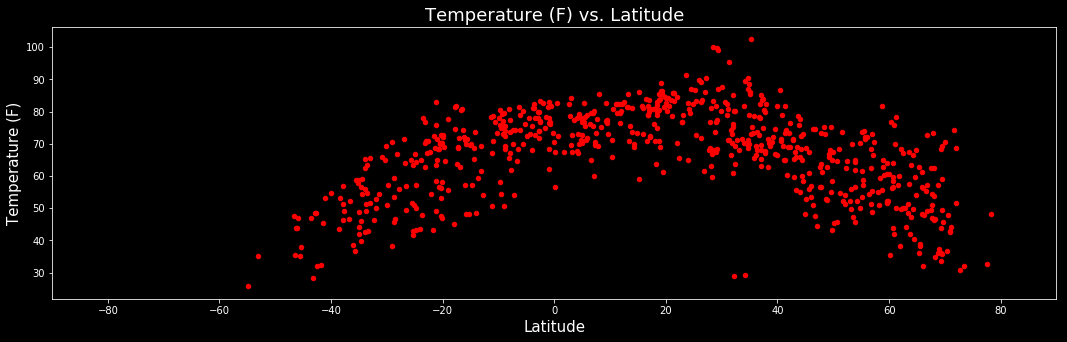

In [28]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'],color = 'red',s=20)
plt.title('Temperature (F) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Temperature (F)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [33]:
df_countries_table.groupby(['Latitude'])['Humidity (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Humidity (%)
0,"(-56.0, -29.0]",86.0161
1,"(-29.0, -18.0]",82.8387
2,"(-18.0, -7.0]",83.0656
3,"(-7.0, 5.0]",94.8871
4,"(5.0, 17.0]",89.5161
5,"(17.0, 26.0]",78.2295
6,"(26.0, 35.0]",68.2581
7,"(35.0, 44.0]",74.6452
8,"(44.0, 54.0]",70.2459
9,"(54.0, 63.0]",74.3387


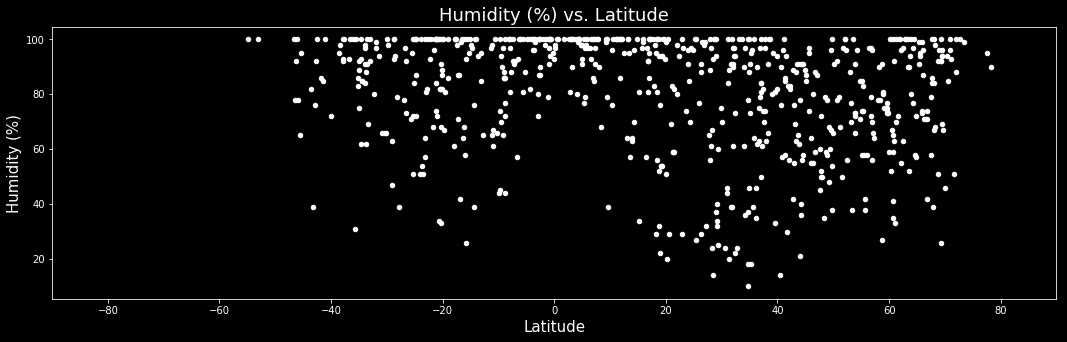

In [34]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Humidity (%)'],color = 'white',s=20);
plt.title('Humidity (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [35]:
df_countries_table.groupby(['Latitude'])['Cloudiness (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Cloudiness (%)
0,"(-56.0, -29.0]",36.2581
1,"(-29.0, -18.0]",20.5161
2,"(-18.0, -7.0]",33.7049
3,"(-7.0, 5.0]",49.0968
4,"(5.0, 17.0]",53.0323
5,"(17.0, 26.0]",38.7541
6,"(26.0, 35.0]",27.5484
7,"(35.0, 44.0]",30.1935
8,"(44.0, 54.0]",43.4754
9,"(54.0, 63.0]",47.6774


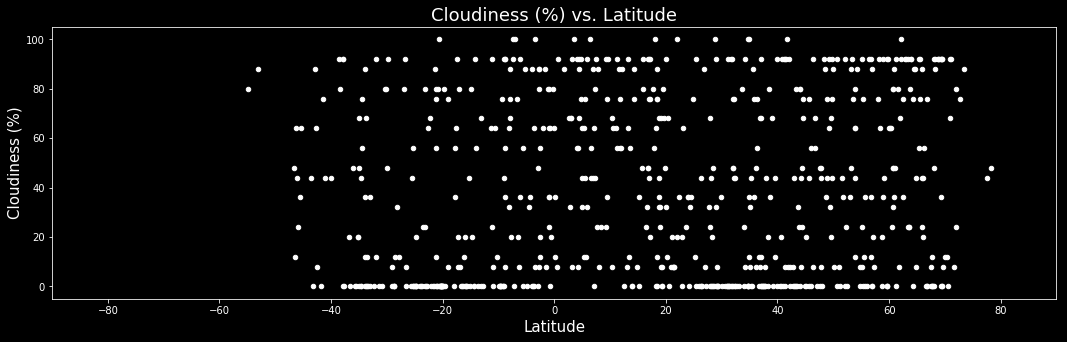

In [36]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Cloudiness (%)'],color = 'w',s=20);
plt.title('Cloudiness (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [37]:
df_countries_table.groupby(['Latitude'])['Wind Speed (mph)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Wind Speed (mph)
0,"(-56.0, -29.0]",11.7015
1,"(-29.0, -18.0]",8.67
2,"(-18.0, -7.0]",8.94934
3,"(-7.0, 5.0]",6.57355
4,"(5.0, 17.0]",8.95
5,"(17.0, 26.0]",8.61623
6,"(26.0, 35.0]",7.61468
7,"(35.0, 44.0]",6.33613
8,"(44.0, 54.0]",8.51311
9,"(54.0, 63.0]",5.68871


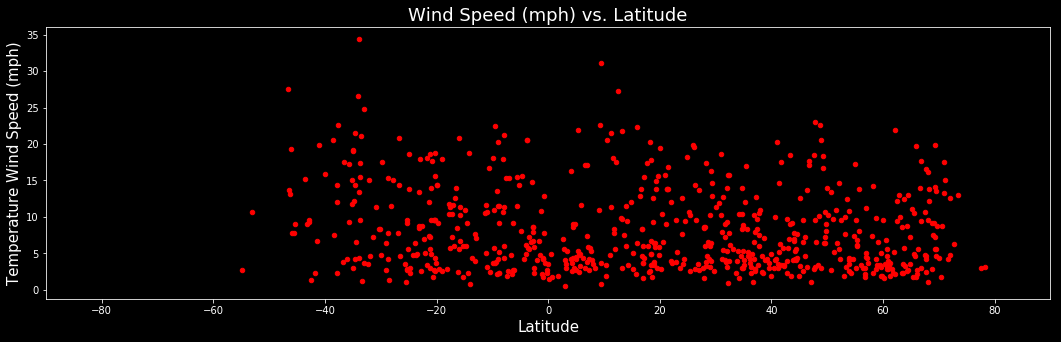

In [38]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Wind Speed (mph)'],color = 'red',s=20);
plt.xlim(-90,90)
plt.title('Wind Speed (mph) vs. Latitude',fontsize=(18));
plt.ylabel('Temperature Wind Speed (mph)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [39]:
print("The average wind speed is {} mph for all randomly selected cities".format(df_countries['Wind Speed (mph)'].mean()))

The average wind speed is 8.142400589101618 mph for all randomly selected cities
